In [ ]:
try:
    import google.colab
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    IN_COLAB = True
except:
    IN_COLAB = False

Mounted at /content/drive


In [ ]:
import os
import torch
import pandas as pd

if IN_COLAB:
    root_path = '/content/drive/MyDrive/Colab Notebooks/ABSA_prep'
else:
    root_path = 'Enter local path'

use_mps = True if torch.backends.mps.is_built() else False
os.chdir(root_path)

## **Preprocessing**

In [ ]:
laptop_opin_train_path = './Dataset/SemEval14/Train/Laptops_Opinion_Train.json'
laptop_opin_test_path = './Dataset/SemEval14/Test/Laptops_Opinion_Test.json'
lap_opin_train = pd.read_json(laptop_opin_train_path)
lap_opin_test = pd.read_json(laptop_opin_test_path)

In [ ]:
lap_opin_train.head()

,raw_words,words,aspects,opinions
0,I charge it at night and skip taking the cord ...,"[I, charge, it, at, night, and, skip, taking, ...","[{'index': 0, 'from': 16, 'to': 18, 'polarity'...","[{'index': 0, 'from': 15, 'to': 16, 'term': ['..."
1,"it is of high quality , has a killer GUI , is ...","[it, is, of, high, quality, ,, has, a, killer,...","[{'index': 0, 'from': 4, 'to': 5, 'polarity': ...","[{'index': 0, 'from': 3, 'to': 4, 'term': ['hi..."
2,Easy to start up and does not overheat as much...,"[Easy, to, start, up, and, does, not, overheat...","[{'index': 0, 'from': 2, 'to': 4, 'polarity': ...","[{'index': 0, 'from': 0, 'to': 1, 'term': ['Ea..."
3,Great laptop that offers many great features !,"[Great, laptop, that, offers, many, great, fea...","[{'index': 0, 'from': 6, 'to': 7, 'polarity': ...","[{'index': 0, 'from': 5, 'to': 6, 'term': ['gr..."
4,One night I turned the freaking thing off afte...,"[One, night, I, turned, the, freaking, thing, ...","[{'index': 0, 'from': 21, 'to': 22, 'polarity'...","[{'index': 0, 'from': 20, 'to': 21, 'term': ['..."


In [ ]:
lap_opin_train['Category'] = 'laptop'
lap_opin_train.head(10)

,raw_words,words,aspects,opinions,Category
0,I charge it at night and skip taking the cord ...,"[I, charge, it, at, night, and, skip, taking, ...","[{'index': 0, 'from': 16, 'to': 18, 'polarity'...","[{'index': 0, 'from': 15, 'to': 16, 'term': ['...",laptop
1,"it is of high quality , has a killer GUI , is ...","[it, is, of, high, quality, ,, has, a, killer,...","[{'index': 0, 'from': 4, 'to': 5, 'polarity': ...","[{'index': 0, 'from': 3, 'to': 4, 'term': ['hi...",laptop
2,Easy to start up and does not overheat as much...,"[Easy, to, start, up, and, does, not, overheat...","[{'index': 0, 'from': 2, 'to': 4, 'polarity': ...","[{'index': 0, 'from': 0, 'to': 1, 'term': ['Ea...",laptop
3,Great laptop that offers many great features !,"[Great, laptop, that, offers, many, great, fea...","[{'index': 0, 'from': 6, 'to': 7, 'polarity': ...","[{'index': 0, 'from': 5, 'to': 6, 'term': ['gr...",laptop
4,One night I turned the freaking thing off afte...,"[One, night, I, turned, the, freaking, thing, ...","[{'index': 0, 'from': 21, 'to': 22, 'polarity'...","[{'index': 0, 'from': 20, 'to': 21, 'term': ['...",laptop
5,"However , the multi-touch gestures and large t...","[However, ,, the, multi-touch, gestures, and, ...","[{'index': 0, 'from': 12, 'to': 14, 'polarity'...","[{'index': 0, 'from': 14, 'to': 15, 'term': ['...",laptop
6,I love the way the entire suite of software wo...,"[I, love, the, way, the, entire, suite, of, so...","[{'index': 0, 'from': 6, 'to': 9, 'polarity': ...","[{'index': 0, 'from': 1, 'to': 2, 'term': ['lo...",laptop
7,The speed is incredible and I am more than sat...,"[The, speed, is, incredible, and, I, am, more,...","[{'index': 0, 'from': 1, 'to': 2, 'polarity': ...","[{'index': 0, 'from': 3, 'to': 4, 'term': ['in...",laptop
8,I can barely use any usb devices because they ...,"[I, can, barely, use, any, usb, devices, becau...","[{'index': 0, 'from': 5, 'to': 7, 'polarity': ...","[{'index': 0, 'from': 10, 'to': 14, 'term': ['...",laptop
9,When I finally had everything running with all...,"[When, I, finally, had, everything, running, w...","[{'index': 0, 'from': 20, 'to': 21, 'polarity'...","[{'index': 0, 'from': 21, 'to': 22, 'term': ['...",laptop


In [ ]:
# lap_opin_train = lap_opin_train.drop('words',axis = 1)
lap_opin_train.head(10)

,raw_words,words,aspects,opinions,Category
0,I charge it at night and skip taking the cord ...,"[I, charge, it, at, night, and, skip, taking, ...","[{'index': 0, 'from': 16, 'to': 18, 'polarity'...","[{'index': 0, 'from': 15, 'to': 16, 'term': ['...",laptop
1,"it is of high quality , has a killer GUI , is ...","[it, is, of, high, quality, ,, has, a, killer,...","[{'index': 0, 'from': 4, 'to': 5, 'polarity': ...","[{'index': 0, 'from': 3, 'to': 4, 'term': ['hi...",laptop
2,Easy to start up and does not overheat as much...,"[Easy, to, start, up, and, does, not, overheat...","[{'index': 0, 'from': 2, 'to': 4, 'polarity': ...","[{'index': 0, 'from': 0, 'to': 1, 'term': ['Ea...",laptop
3,Great laptop that offers many great features !,"[Great, laptop, that, offers, many, great, fea...","[{'index': 0, 'from': 6, 'to': 7, 'polarity': ...","[{'index': 0, 'from': 5, 'to': 6, 'term': ['gr...",laptop
4,One night I turned the freaking thing off afte...,"[One, night, I, turned, the, freaking, thing, ...","[{'index': 0, 'from': 21, 'to': 22, 'polarity'...","[{'index': 0, 'from': 20, 'to': 21, 'term': ['...",laptop
5,"However , the multi-touch gestures and large t...","[However, ,, the, multi-touch, gestures, and, ...","[{'index': 0, 'from': 12, 'to': 14, 'polarity'...","[{'index': 0, 'from': 14, 'to': 15, 'term': ['...",laptop
6,I love the way the entire suite of software wo...,"[I, love, the, way, the, entire, suite, of, so...","[{'index': 0, 'from': 6, 'to': 9, 'polarity': ...","[{'index': 0, 'from': 1, 'to': 2, 'term': ['lo...",laptop
7,The speed is incredible and I am more than sat...,"[The, speed, is, incredible, and, I, am, more,...","[{'index': 0, 'from': 1, 'to': 2, 'polarity': ...","[{'index': 0, 'from': 3, 'to': 4, 'term': ['in...",laptop
8,I can barely use any usb devices because they ...,"[I, can, barely, use, any, usb, devices, becau...","[{'index': 0, 'from': 5, 'to': 7, 'polarity': ...","[{'index': 0, 'from': 10, 'to': 14, 'term': ['...",laptop
9,When I finally had everything running with all...,"[When, I, finally, had, everything, running, w...","[{'index': 0, 'from': 20, 'to': 21, 'polarity'...","[{'index': 0, 'from': 21, 'to': 22, 'term': ['...",laptop


In [ ]:
# Assuming lap_opin_train is a DataFrame containing the JSON data

aspects_list = []
for index, row in lap_opin_train.iterrows():
    for aspect in row['aspects']:
        opinions = row['opinions']
        opinion_term = [opinion['term'][0] for opinion in opinions if opinion['index'] == aspect['index']]
        aspects_list.append({
            'Text': row['raw_words'],
            'Aspect_Term': ' '.join(aspect['term']),
            'Words': row['words'],
            'Aspect_Category': 'Laptop',
            'Polarity': aspect['polarity'],
            'Opinion': opinion_term  # Storing the opinion terms as a list
        })

# Create a DataFrame
df = pd.DataFrame(aspects_list)

df.head(12)

,Text,Aspect_Term,Words,Aspect_Category,Polarity,Opinion
0,I charge it at night and skip taking the cord ...,battery life,"[I, charge, it, at, night, and, skip, taking, ...",Laptop,POS,[good]
1,"it is of high quality , has a killer GUI , is ...",quality,"[it, is, of, high, quality, ,, has, a, killer,...",Laptop,POS,[high]
2,"it is of high quality , has a killer GUI , is ...",GUI,"[it, is, of, high, quality, ,, has, a, killer,...",Laptop,POS,[killer]
3,"it is of high quality , has a killer GUI , is ...",applications,"[it, is, of, high, quality, ,, has, a, killer,...",Laptop,POS,[good]
4,"it is of high quality , has a killer GUI , is ...",use,"[it, is, of, high, quality, ,, has, a, killer,...",Laptop,POS,[easy]
5,Easy to start up and does not overheat as much...,start up,"[Easy, to, start, up, and, does, not, overheat...",Laptop,POS,[Easy]
6,Great laptop that offers many great features !,features,"[Great, laptop, that, offers, many, great, fea...",Laptop,POS,[great]
7,One night I turned the freaking thing off afte...,GUI,"[One, night, I, turned, the, freaking, thing, ...",Laptop,NEG,[no]
8,One night I turned the freaking thing off afte...,screen,"[One, night, I, turned, the, freaking, thing, ...",Laptop,NEG,[dark]
9,One night I turned the freaking thing off afte...,power light,"[One, night, I, turned, the, freaking, thing, ...",Laptop,NEU,[steady]


In [ ]:
aspects_list = []
for index, row in lap_opin_train.iterrows():
    aspect_terms = []
    opinions_list = []
    for aspect in row['aspects']:
        aspect_terms.append(' '.join(aspect['term']))
        opinions = [opinion['term'][0] for opinion in row['opinions'] if opinion['index'] == aspect['index']]
        opinions_list.extend(opinions)

    aspects_list.append({
        'Text': row['raw_words'],
        'Words': row['words'],
        'Aspect_Terms': aspect_terms,
        'Opinions': opinions_list,
        'Aspect_Category': 'Laptop',
        'Polarity': aspect['polarity'],
    })

# Create a DataFrame
df = pd.DataFrame(aspects_list)

# Display the DataFrame
df.head()

,Text,Words,Aspect_Terms,Opinions,Aspect_Category,Polarity
0,I charge it at night and skip taking the cord ...,"[I, charge, it, at, night, and, skip, taking, ...",[battery life],[good],Laptop,POS
1,"it is of high quality , has a killer GUI , is ...","[it, is, of, high, quality, ,, has, a, killer,...","[quality, GUI, applications, use]","[high, killer, good, easy]",Laptop,POS
2,Easy to start up and does not overheat as much...,"[Easy, to, start, up, and, does, not, overheat...",[start up],[Easy],Laptop,POS
3,Great laptop that offers many great features !,"[Great, laptop, that, offers, many, great, fea...",[features],[great],Laptop,POS
4,One night I turned the freaking thing off afte...,"[One, night, I, turned, the, freaking, thing, ...","[GUI, screen, power light, hard drive light]","[no, dark, steady, steady]",Laptop,NEG


In [ ]:
df.to_csv('laptop_opi_f1.csv', index=False)

In [ ]:
lap_opin_train.to_csv('laptop_opi_f2.csv', index=False)

In [ ]:
df.head(10)

,Text,Words,Aspect_Terms,Opinions,Aspect_Category,Polarity
0,I charge it at night and skip taking the cord ...,"[I, charge, it, at, night, and, skip, taking, ...",[battery life],[good],Laptop,POS
1,"it is of high quality , has a killer GUI , is ...","[it, is, of, high, quality, ,, has, a, killer,...","[quality, GUI, applications, use]","[high, killer, good, easy]",Laptop,POS
2,Easy to start up and does not overheat as much...,"[Easy, to, start, up, and, does, not, overheat...",[start up],[Easy],Laptop,POS
3,Great laptop that offers many great features !,"[Great, laptop, that, offers, many, great, fea...",[features],[great],Laptop,POS
4,One night I turned the freaking thing off afte...,"[One, night, I, turned, the, freaking, thing, ...","[GUI, screen, power light, hard drive light]","[no, dark, steady, steady]",Laptop,NEG
5,"However , the multi-touch gestures and large t...","[However, ,, the, multi-touch, gestures, and, ...",[external mouse],[unnecessary],Laptop,NEU
6,I love the way the entire suite of software wo...,"[I, love, the, way, the, entire, suite, of, so...",[suite of software],[love],Laptop,POS
7,The speed is incredible and I am more than sat...,"[The, speed, is, incredible, and, I, am, more,...","[speed, speed]","[incredible, satisfied]",Laptop,POS
8,I can barely use any usb devices because they ...,"[I, can, barely, use, any, usb, devices, becau...",[usb devices],[not],Laptop,NEG
9,When I finally had everything running with all...,"[When, I, finally, had, everything, running, w...",[system],[crashed],Laptop,NEG


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             906 non-null    object
 1   Words            906 non-null    object
 2   Aspect_Terms     906 non-null    object
 3   Opinions         906 non-null    object
 4   Aspect_Category  906 non-null    object
 5   Polarity         906 non-null    object
dtypes: object(6)
memory usage: 42.6+ KB


### **Using Bag Of Words Approach**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming you have 'Words' and 'Polarity' columns in a DataFrame 'df'
words = df['Words']
polarity = df['Polarity']

# Convert categorical polarity to numerical labels
polarity_mapping = {'POS': 1, 'NEG': -1, 'NEU': 0}
y = [polarity_mapping[p] for p in polarity]

# Join lists of words into strings for each row
processed_words = [' '.join(word_list) for word_list in words]

# Create Bag of Words representation
vectorizer = CountVectorizer(lowercase=True, stop_words='english')
X = vectorizer.fit_transform(processed_words)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model (using Naive Bayes as an example)
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicting polarity on test set
y_pred = model.predict(X_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6758241758241759


**Using the aspect terms and its opinions for checking polarity**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# words = df['Words']
opinions = df['Opinions']
aspect_terms = df['Aspect_Terms']
polarity = df['Polarity']

# Convert categorical polarity to numerical labels
polarity_mapping = {'POS': 1, 'NEG': -1, 'NEU': 0}
y = [polarity_mapping[p] for p in polarity]

# Combine opinions, and aspect terms into a single string for each row
combined_text = []
for i in range(len(words)):
    combined_text.append(' '.join([ str(opinions.iloc[i]), str(aspect_terms.iloc[i])]))

# Create Bag of Words representation
vectorizer = CountVectorizer(lowercase=True, stop_words='english')
X = vectorizer.fit_transform(combined_text)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model (using Naive Bayes as an example)
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicting polarity on test set
y_pred = model.predict(X_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7032967032967034


**Using only the opinions for checking polarity**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# words = df['Words']
opinions = df['Opinions']
aspect_terms = df['Aspect_Terms']
polarity = df['Polarity']

# Convert categorical polarity to numerical labels
polarity_mapping = {'POS': 1, 'NEG': -1, 'NEU': 0}
y = [polarity_mapping[p] for p in polarity]

# Combine opinions, and aspect terms into a single string for each row
combined_text = []
for i in range(len(words)):
    combined_text.append(' '.join([ str(opinions.iloc[i])]))

# Create Bag of Words representation
vectorizer = CountVectorizer(lowercase=True, stop_words='english')
X = vectorizer.fit_transform(combined_text)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model (using Naive Bayes as an example)
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicting polarity on test set
y_pred = model.predict(X_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7252747252747253


### **Using TF-IDF representation and SVM classifier**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

opinions = df['Opinions']
aspect_terms = df['Aspect_Terms']
polarity = df['Polarity']

combined_text = []
for i in range(len(words)):
    combined_text.append(' '.join([ str(opinions.iloc[i]), str(aspect_terms.iloc[i])]))

# Create TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(combined_text)

# Splitting data into train and test sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predicting polarity on test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluating accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy using SVM and TF-IDF: {accuracy_svm}")

Accuracy using SVM and TF-IDF: 0.7527472527472527


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

words = df['Words']
# opinions = df['Opinions']
# aspect_terms = df['Aspect_Terms']
polarity = df['Polarity']

combined_text = []
for i in range(len(words)):
    combined_text.append(' '.join([str(words.iloc[i])]))

# Create TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(combined_text)

# Splitting data into train and test sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predicting polarity on test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluating accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy using SVM and TF-IDF: {accuracy_svm}")

Accuracy using SVM and TF-IDF: 0.7527472527472527


Now since the basic weight lifting is done lets aggregate all the data and use the model on it

Concatenating all datasets

In [ ]:
# semeval14 dataset
# dataset paths
laptop_opin_train_path1 = './Dataset/SemEval14/Train/Laptops_Opinion_Train.json'
restaurant_opin_train_path1 = './Dataset/SemEval14/Train/Restaurants_Opinion_Train.json'

laptop_opin_test_path1 = './Dataset/SemEval14/Test/Laptops_Opinion_Test.json'
restaurant_opin_test_path1 = './Dataset/SemEval14/Test/Restaurants_Opinion_Test.json'

laptop_opin_validation_path1 = './Dataset/SemEval14/Validation/Laptops_Opinion_Validation.json'
restaurant_opin_validation_path1 = './Dataset/SemEval14/Validation/Restaurants_Opinion_Validation.json'

# semeval15 dataset
restaurant_opin_train_path2 = './Dataset/SemEval15/Train/Restaurants_Opinion_Train.json'
restaurant_opin_test_path2 = './Dataset/SemEval15/Test/Restaurants_Opinion_Test.json'
restaurant_opin_validation_path2 = './Dataset/SemEval15/Validation/Restaurants_Opinion_Validation.json'

# semeval16 dataset
restaurant_opin_train_path3 = './Dataset/SemEval16/Train/Restaurants_Opinion_Train.json'
restaurant_opin_test_path3 = './Dataset/SemEval16/Test/Restaurants_Opinion_Test.json'
restaurant_opin_validation_path3 = './Dataset/SemEval16/Validation/Restaurants_Opinion_Validation.json'

# dataframes
lap_opin_train1 = pd.read_json(laptop_opin_train_path1)
lap_opin_test1 = pd.read_json(laptop_opin_test_path1)
lap_opin_val1 = pd.read_json(laptop_opin_validation_path1)

restaurant_opin_train1 = pd.read_json(restaurant_opin_train_path1)
restaurant_opin_test1 = pd.read_json(restaurant_opin_test_path1)
restaurant_opin_val1 = pd.read_json(restaurant_opin_validation_path1)

restaurant_opin_train2 = pd.read_json(restaurant_opin_train_path2)
restaurant_opin_test2 = pd.read_json(restaurant_opin_test_path2)
restaurant_opin_val2 = pd.read_json(restaurant_opin_validation_path2)

restaurant_opin_train3 = pd.read_json(restaurant_opin_train_path3)
restaurant_opin_test3 = pd.read_json(restaurant_opin_test_path3)
restaurant_opin_val3 = pd.read_json(restaurant_opin_validation_path3)

In [ ]:
lap_opin_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raw_words  328 non-null    object
 1   words      328 non-null    object
 2   aspects    328 non-null    object
 3   opinions   328 non-null    object
dtypes: object(4)
memory usage: 10.4+ KB


In [ ]:
lap_opin_val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raw_words  219 non-null    object
 1   words      219 non-null    object
 2   aspects    219 non-null    object
 3   opinions   219 non-null    object
dtypes: object(4)
memory usage: 7.0+ KB


In [ ]:
lap_opin_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raw_words  906 non-null    object
 1   words      906 non-null    object
 2   aspects    906 non-null    object
 3   opinions   906 non-null    object
dtypes: object(4)
memory usage: 28.4+ KB


### **Laptop data**

In [ ]:
laptop_data = pd.concat([lap_opin_train1, lap_opin_test1, lap_opin_val1])
laptop_data['category'] = 'laptop'
laptop_data = laptop_data.reset_index(drop=True)
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raw_words  1453 non-null   object
 1   words      1453 non-null   object
 2   aspects    1453 non-null   object
 3   opinions   1453 non-null   object
 4   category   1453 non-null   object
dtypes: object(5)
memory usage: 56.9+ KB


In [ ]:
laptop_data.tail()

,raw_words,words,aspects,opinions,category
1448,It seemed to be a very nice laptop except I wa...,"[It, seemed, to, be, a, very, nice, laptop, ex...","[{'index': 0, 'from': 16, 'to': 19, 'polarity'...","[{'index': 0, 'from': 11, 'to': 15, 'term': ['...",laptop
1449,Was very much worth the price i paid .,"[Was, very, much, worth, the, price, i, paid, .]","[{'index': 0, 'from': 5, 'to': 6, 'polarity': ...","[{'index': 0, 'from': 3, 'to': 4, 'term': ['wo...",laptop
1450,This is a great little computer for the price .,"[This, is, a, great, little, computer, for, th...","[{'index': 0, 'from': 8, 'to': 9, 'polarity': ...","[{'index': 0, 'from': 3, 'to': 4, 'term': ['gr...",laptop
1451,All apple associates are always willing to hel...,"[All, apple, associates, are, always, willing,...","[{'index': 0, 'from': 1, 'to': 3, 'polarity': ...","[{'index': 0, 'from': 5, 'to': 6, 'term': ['wi...",laptop
1452,I would like to use a different operating syst...,"[I, would, like, to, use, a, different, operat...","[{'index': 0, 'from': 7, 'to': 9, 'polarity': ...","[{'index': 0, 'from': 2, 'to': 3, 'term': ['li...",laptop


In [ ]:
aspects_list = []
for index, row in laptop_data.iterrows():
    aspect_terms = []
    opinions_list = []
    for aspect in row['aspects']:
        aspect_terms.append(' '.join(aspect['term']))
        opinions = [opinion['term'][0] for opinion in row['opinions'] if opinion['index'] == aspect['index']]
        opinions_list.extend(opinions)

    aspects_list.append({
        'Text': row['raw_words'],
        'Words': row['words'],
        'Aspect_Terms': aspect_terms,
        'Opinions': opinions_list,
        'Aspect_Category': row['category'],
        'Polarity': aspect['polarity'],
    })

# Create a DataFrame
lap_df = pd.DataFrame(aspects_list)

# Display the DataFrame
lap_df.head()

,Text,Words,Aspect_Terms,Opinions,Aspect_Category,Polarity
0,I charge it at night and skip taking the cord ...,"[I, charge, it, at, night, and, skip, taking, ...",[battery life],[good],laptop,POS
1,"it is of high quality , has a killer GUI , is ...","[it, is, of, high, quality, ,, has, a, killer,...","[quality, GUI, applications, use]","[high, killer, good, easy]",laptop,POS
2,Easy to start up and does not overheat as much...,"[Easy, to, start, up, and, does, not, overheat...",[start up],[Easy],laptop,POS
3,Great laptop that offers many great features !,"[Great, laptop, that, offers, many, great, fea...",[features],[great],laptop,POS
4,One night I turned the freaking thing off afte...,"[One, night, I, turned, the, freaking, thing, ...","[GUI, screen, power light, hard drive light]","[no, dark, steady, steady]",laptop,NEG


In [ ]:
# Drop rows where 'Polarity' is 'NEU'
lap_df_filtered = lap_df[lap_df['Polarity'] != 'NEU']
lap_df_filtered = lap_df_filtered.reset_index(drop=True)
lap_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             1305 non-null   object
 1   Words            1305 non-null   object
 2   Aspect_Terms     1305 non-null   object
 3   Opinions         1305 non-null   object
 4   Aspect_Category  1305 non-null   object
 5   Polarity         1305 non-null   object
dtypes: object(6)
memory usage: 61.3+ KB


In [ ]:
lap_df_filtered.tail()

,Text,Words,Aspect_Terms,Opinions,Aspect_Category,Polarity
1300,It had most of the features and all of the pow...,"[It, had, most, of, the, features, and, all, o...","[features, power]","[wanted, wanted]",laptop,POS
1301,It seemed to be a very nice laptop except I wa...,"[It, seemed, to, be, a, very, nice, laptop, ex...","[Garmin GPS software, Microsoft Office 2003]","[not, not]",laptop,NEG
1302,Was very much worth the price i paid .,"[Was, very, much, worth, the, price, i, paid, .]",[price],[worth],laptop,POS
1303,This is a great little computer for the price .,"[This, is, a, great, little, computer, for, th...",[price],[great],laptop,POS
1304,All apple associates are always willing to hel...,"[All, apple, associates, are, always, willing,...",[apple associates],[willing],laptop,POS


In [ ]:
lap_df = lap_df_filtered

In [ ]:
lap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             1305 non-null   object
 1   Words            1305 non-null   object
 2   Aspect_Terms     1305 non-null   object
 3   Opinions         1305 non-null   object
 4   Aspect_Category  1305 non-null   object
 5   Polarity         1305 non-null   object
dtypes: object(6)
memory usage: 61.3+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

words = lap_df['Words']
opinions = lap_df['Opinions']
aspect_terms = lap_df['Aspect_Terms']
polarity = lap_df['Polarity']

# Convert categorical polarity to numerical labels
polarity_mapping = {'POS': 1, 'NEG': -1, 'NEU': 0}
y = [polarity_mapping[p] for p in polarity]

combined_text = []
for i in range(len(words)):
    combined_text.append(' '.join([ str(opinions.iloc[i]), str(aspect_terms.iloc[i])]))

# Create TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(combined_text)

# Splitting data into train and test sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=20)

# Training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predicting polarity on test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluating accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy using SVM and TF-IDF: {accuracy_svm}")

Accuracy using SVM and TF-IDF: 0.8505747126436781


### **Restaurant Data**

In [ ]:
restaurant_data = pd.concat([restaurant_opin_train1,restaurant_opin_test1,restaurant_opin_val1,restaurant_opin_train2,restaurant_opin_test2,restaurant_opin_val2,restaurant_opin_train2,restaurant_opin_test2,restaurant_opin_val3])
restaurant_data['category'] = 'restaurants'

In [ ]:
restaurant_data.head()

,raw_words,words,aspects,opinions,category
0,But the staff was so horrible to us .,"[But, the, staff, was, so, horrible, to, us, .]","[{'index': 0, 'from': 2, 'to': 3, 'polarity': ...","[{'index': 0, 'from': 5, 'to': 6, 'term': ['ho...",restaurants
1,"To be completely fair , the only redeeming fac...","[To, be, completely, fair, ,, the, only, redee...","[{'index': 0, 'from': 11, 'to': 12, 'polarity'...","[{'index': 0, 'from': 15, 'to': 17, 'term': ['...",restaurants
2,"The food is uniformly exceptional , with a ver...","[The, food, is, uniformly, exceptional, ,, wit...","[{'index': 0, 'from': 1, 'to': 2, 'polarity': ...","[{'index': 0, 'from': 4, 'to': 5, 'term': ['ex...",restaurants
3,Our agreed favorite is the orrechiete with sau...,"[Our, agreed, favorite, is, the, orrechiete, w...","[{'index': 0, 'from': 5, 'to': 10, 'polarity':...","[{'index': 0, 'from': 2, 'to': 3, 'term': ['fa...",restaurants
4,The Bagels have an outstanding taste with a te...,"[The, Bagels, have, an, outstanding, taste, wi...","[{'index': 0, 'from': 1, 'to': 2, 'polarity': ...","[{'index': 0, 'from': 4, 'to': 5, 'term': ['ou...",restaurants


In [ ]:
aspects_list = []
for index, row in restaurant_data.iterrows():
    aspect_terms = []
    opinions_list = []
    for aspect in row['aspects']:
        aspect_terms.append(' '.join(aspect['term']))
        opinions = [opinion['term'][0] for opinion in row['opinions'] if opinion['index'] == aspect['index']]
        opinions_list.extend(opinions)

    aspects_list.append({
        'Text': row['raw_words'],
        'Words': row['words'],
        'Aspect_Terms': aspect_terms,
        'Opinions': opinions_list,
        'Aspect_Category': row['category'],
        'Polarity': aspect['polarity'],
    })

# Create a DataFrame
res_df = pd.DataFrame(aspects_list)

# Display the DataFrame
res_df.head()

,Text,Words,Aspect_Terms,Opinions,Aspect_Category,Polarity
0,But the staff was so horrible to us .,"[But, the, staff, was, so, horrible, to, us, .]",[staff],[horrible],restaurants,NEG
1,"To be completely fair , the only redeeming fac...","[To, be, completely, fair, ,, the, only, redee...",[food],[above],restaurants,POS
2,"The food is uniformly exceptional , with a ver...","[The, food, is, uniformly, exceptional, ,, wit...","[food, kitchen]","[exceptional, capable]",restaurants,POS
3,Our agreed favorite is the orrechiete with sau...,"[Our, agreed, favorite, is, the, orrechiete, w...","[orrechiete with sausage and chicken, waiters]","[favorite, kind]",restaurants,POS
4,The Bagels have an outstanding taste with a te...,"[The, Bagels, have, an, outstanding, taste, wi...","[Bagels, Bagels, Bagels, Bagels]","[outstanding, terrific, chewy, gummy]",restaurants,POS


In [ ]:
res_df_filtered = res_df[res_df['Polarity'] != 'NEU']
res_df_filtered = res_df_filtered.reset_index(drop=True)
res_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4021 entries, 0 to 4020
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             4021 non-null   object
 1   Words            4021 non-null   object
 2   Aspect_Terms     4021 non-null   object
 3   Opinions         4021 non-null   object
 4   Aspect_Category  4021 non-null   object
 5   Polarity         4021 non-null   object
dtypes: object(6)
memory usage: 188.6+ KB


In [ ]:
res_df = res_df_filtered
res_df.tail()

,Text,Words,Aspect_Terms,Opinions,Aspect_Category,Polarity
4016,"The hot dogs are top notch , and they 're Slam...","[The, hot, dogs, are, top, notch, ,, and, they...","[hot dogs, Slamwich]","[top, amazing]",restaurants,POS
4017,"But nonetheless -- great spot , great food .","[But, nonetheless, --, great, spot, ,, great, ...","[spot, food]","[great, great]",restaurants,POS
4018,"This guy refused to seat her and she left , fo...","[This, guy, refused, to, seat, her, and, she, ...",[frontman],[bad],restaurants,NEG
4019,Mussles and calamari were superb Saturday even...,"[Mussles, and, calamari, were, superb, Saturda...","[Mussles, calamari]","[superb, superb]",restaurants,POS
4020,I had the Lamb special which was perfect .,"[I, had, the, Lamb, special, which, was, perfe...",[Lamb special],[perfect],restaurants,POS


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

words = res_df['Words']
opinions = res_df['Opinions']
aspect_terms = res_df['Aspect_Terms']
polarity = res_df['Polarity']

polarity_mapping = {'POS': 1, 'NEG': -1}
y = [polarity_mapping[p] for p in polarity]

combined_text = []
for i in range(len(words)):
    combined_text.append(' '.join([ str(opinions.iloc[i]), str(aspect_terms.iloc[i])]))

# Create TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(combined_text)

# Splitting data into train and test sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predicting polarity on test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluating accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy using SVM and TF-IDF: {accuracy_svm}")

Accuracy using SVM and TF-IDF: 0.8956521739130435


### **Combining all data**

In [ ]:
all_df = pd.concat([lap_df,res_df])
all_df = all_df.reset_index(drop=True)
all_df.head()

,Text,Words,Aspect_Terms,Opinions,Aspect_Category,Polarity
0,I charge it at night and skip taking the cord ...,"[I, charge, it, at, night, and, skip, taking, ...",[battery life],[good],laptop,POS
1,"it is of high quality , has a killer GUI , is ...","[it, is, of, high, quality, ,, has, a, killer,...","[quality, GUI, applications, use]","[high, killer, good, easy]",laptop,POS
2,Easy to start up and does not overheat as much...,"[Easy, to, start, up, and, does, not, overheat...",[start up],[Easy],laptop,POS
3,Great laptop that offers many great features !,"[Great, laptop, that, offers, many, great, fea...",[features],[great],laptop,POS
4,One night I turned the freaking thing off afte...,"[One, night, I, turned, the, freaking, thing, ...","[GUI, screen, power light, hard drive light]","[no, dark, steady, steady]",laptop,NEG


In [ ]:
all_df.tail()

,Text,Words,Aspect_Terms,Opinions,Aspect_Category,Polarity
5321,"The hot dogs are top notch , and they 're Slam...","[The, hot, dogs, are, top, notch, ,, and, they...","[hot dogs, Slamwich]","[top, amazing]",restaurants,POS
5322,"But nonetheless -- great spot , great food .","[But, nonetheless, --, great, spot, ,, great, ...","[spot, food]","[great, great]",restaurants,POS
5323,"This guy refused to seat her and she left , fo...","[This, guy, refused, to, seat, her, and, she, ...",[frontman],[bad],restaurants,NEG
5324,Mussles and calamari were superb Saturday even...,"[Mussles, and, calamari, were, superb, Saturda...","[Mussles, calamari]","[superb, superb]",restaurants,POS
5325,I had the Lamb special which was perfect .,"[I, had, the, Lamb, special, which, was, perfe...",[Lamb special],[perfect],restaurants,POS


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             5326 non-null   object
 1   Words            5326 non-null   object
 2   Aspect_Terms     5326 non-null   object
 3   Opinions         5326 non-null   object
 4   Aspect_Category  5326 non-null   object
 5   Polarity         5326 non-null   object
dtypes: object(6)
memory usage: 249.8+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

words = all_df['Words']
opinions = all_df['Opinions']
aspect_terms = all_df['Aspect_Terms']
polarity = all_df['Polarity']

polarity_mapping = {'POS': 1, 'NEG': -1}
y = [polarity_mapping[p] for p in polarity]

combined_text = []
for i in range(len(words)):
    combined_text.append(' '.join([str(words.iloc[i])]))

# Create TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(combined_text)

# Splitting data into train and test sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predicting polarity on test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluating accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy using SVM and TF-IDF: {accuracy_svm}")

Accuracy using SVM and TF-IDF: 0.8789868667917449


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_svm, average='binary')
recall = recall_score(y_test, y_pred_svm, average='binary')
f1 = f1_score(y_test, y_pred_svm, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8793
Recall: 0.9601
F1-Score: 0.9179


## **Classification and Implementation**

In [ ]:
new_input = "This product is terrible."
new_input_tfidf = tfidf_vectorizer.transform([new_input])
# Predict the sentiment polarity for the new input using the trained SVM model
predicted_polarity = svm_model.predict(new_input_tfidf)
if predicted_polarity == 1:
  print("The predicted polarity for the input is positive")
else:
  print("The predicted polarity for the input is negative")

The predicted polarity for the input is negative


In [ ]:
# print("Enter a sentence")
# data = input()
# new_input_tfidf = tfidf_vectorizer.transform([data])
# # Predict the sentiment polarity for the new input using the trained SVM model
# predicted_polarity = svm_model.predict(new_input_tfidf)
# if predicted_polarity == 1:
#   print("The predicted polarity for the input is positive")
# else:
#   print("The predicted polarity for the input is negative")

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def find_aspects_opinions(sentence):
    doc = nlp(sentence)
    aspects = []
    opinions = []

    for token in doc:
        if token.dep_ == 'nsubj' or token.dep_ == 'dobj' or token.dep_ == 'pobj':
            aspects.append(token.text)

    for token in doc:
        if token.dep_ == 'acomp' or token.dep_ == 'advmod' or token.dep_ == 'amod':
            opinions.append(token.text)

    return aspects, opinions

sentence = "The camera of this phone is excellent but the battery life is disappointing."
sen1 = "the food is good but service was terrible"
aspects, opinions = find_aspects_opinions(sen1)

print("Aspects:", aspects)
print("Opinions:", opinions)

Aspects: ['food', 'service']
Opinions: ['good', 'terrible']


## **Social media Data**

In [ ]:
tweets_train_path = './Dataset/tweets_data/train.csv'
tweets_test_path = './Dataset/tweets_data/test.csv'
tweets_train = pd.read_csv(tweets_train_path, delimiter=',', encoding='ISO-8859-1')
tweets_test = pd.read_csv(tweets_test_path, delimiter=',', encoding='ISO-8859-1')

In [ ]:
tweets_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [ ]:
tweets_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [ ]:
# List of columns to drop for train_data
columns_to_drop = ['Time of Tweet', 'selected_text','Age of User', 'Country', 'Population -2020','Land Area (Km²)','Density (P/Km²)','textID']
tweets_train.drop(columns=columns_to_drop, inplace=True)
tweets_train.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
columns_to_drop = ['Time of Tweet','Age of User', 'Country', 'Population -2020','Land Area (Km²)','Density (P/Km²)','textID']
tweets_test.drop(columns=columns_to_drop, inplace=True)
tweets_test.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [ ]:
# Function to remove links from text
import re
def remove_links(text):
    if pd.isnull(text):
        return text  # Return NaN if the value is NaN
    return re.sub(r'http\S+', '', text)

In [ ]:
# Applying the function to the 'text' column
tweets_train['text'] = tweets_train['text'].apply(remove_links)
tweets_test['text'] = tweets_test['text'].apply(remove_links)
# Dropping rows where 'sentiment' is 'neutral'
tweets_train = tweets_train[tweets_train['sentiment'] != 'neutral']
tweets_test = tweets_test[tweets_test['sentiment'] != 'neutral']

In [ ]:
tweets_train.head()

,text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
6,2am feedings for the baby are fun when he is a...,positive


In [ ]:
tweets_test.head()

,text,sentiment
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,- I like it!!,positive
5,that`s great!! weee!! visitors!,positive


In [ ]:
tweets_train.dropna(inplace=True)
tweets_test.dropna(inplace=True)
tweets_train = tweets_train.reset_index(drop=True)
tweets_test = tweets_test.reset_index(drop=True)
tweets_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       16363 non-null  object
 1   sentiment  16363 non-null  object
dtypes: object(2)
memory usage: 255.8+ KB


In [ ]:
tweets_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2104 non-null   object
 1   sentiment  2104 non-null   object
dtypes: object(2)
memory usage: 33.0+ KB


In [ ]:
# takes 2-3 mins
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_sm")

# Function to find aspects and opinions for each sentence in a DataFrame
def find_aspects_opinions_dataframe(df, text_column):
    aspects_list = []
    opinions_list = []

    for sentence in df[text_column]:
        doc = nlp(sentence)
        aspects = []
        opinions = []

        for token in doc:
            if token.dep_ in ['nsubj', 'dobj', 'pobj']:
                if token.pos_ == 'NOUN':
                    aspects.append(token.text)

        for token in doc:
            if token.dep_ in ['acomp', 'advmod', 'amod']:
                if token.pos_ == 'ADJ':
                    opinions.append(token.text)

        aspects_list.append(aspects)
        opinions_list.append(opinions)

    df['aspects'] = aspects_list
    df['opinions'] = opinions_list
    return df

train_df = find_aspects_opinions_dataframe(tweets_train, 'text')
train_df.head()

,text,sentiment,aspects,opinions
0,Sooo SAD I will miss you here in San Diego!!!,negative,[],[]
1,my boss is bullying me...,negative,[boss],[]
2,what interview! leave me alone,negative,[interview],[]
3,"Sons of ****, why couldn`t they put them on t...",negative,[releases],[]
4,2am feedings for the baby are fun when he is a...,positive,"[feedings, baby]",[fun]


In [ ]:
df_filtered = train_df[(train_df['aspects'].apply(len) > 0) & (train_df['opinions'].apply(len) > 0)]
tweets_train = df_filtered
tweets_train = tweets_train.reset_index(drop=True)
tweets_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7230 entries, 0 to 7229
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       7230 non-null   object
 1   sentiment  7230 non-null   object
 2   aspects    7230 non-null   object
 3   opinions   7230 non-null   object
dtypes: object(4)
memory usage: 226.1+ KB


In [ ]:
test_df = find_aspects_opinions_dataframe(tweets_test, 'text')
tweets_test = test_df[(test_df['aspects'].apply(len) > 0) & (test_df['opinions'].apply(len) > 0)]
tweets_test = tweets_test.reset_index(drop=True)
tweets_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       894 non-null    object
 1   sentiment  894 non-null    object
 2   aspects    894 non-null    object
 3   opinions   894 non-null    object
dtypes: object(4)
memory usage: 28.1+ KB


In [ ]:
tweets_df = pd.concat([tweets_train, tweets_test])
tweets_df['category'] = 'social media'
tweets_df = tweets_df.reset_index(drop=True)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       8124 non-null   object
 1   sentiment  8124 non-null   object
 2   aspects    8124 non-null   object
 3   opinions   8124 non-null   object
 4   category   8124 non-null   object
dtypes: object(5)
memory usage: 317.5+ KB


In [ ]:
# Function to extract words
def extract_words(text):
    return text.split()

# Check the column names
print(tweets_df.columns)

# Applying the function to create 'words' column
if 'text' in tweets_df.columns:
    tweets_df['words'] = tweets_df['text'].apply(extract_words)
else:
    print("Column 'text' not found in the DataFrame.")

Index(['text', 'sentiment', 'aspects', 'opinions', 'category'], dtype='object')


In [ ]:
tweets_df.head()

,text,sentiment,aspects,opinions,category,words
0,2am feedings for the baby are fun when he is a...,positive,"[feedings, baby]",[fun],social media,"[2am, feedings, for, the, baby, are, fun, when..."
1,My Sharpie is running DANGERously low on ink,negative,[ink],[low],social media,"[My, Sharpie, is, running, DANGERously, low, o..."
2,i`ve been sick for the past few days and thus...,negative,"[days, hair, hat]","[sick, past, few, wierd]",social media,"[i`ve, been, sick, for, the, past, few, days, ..."
3,Playing Ghost Online is really interesting. Th...,positive,"[updates, job, Can`t, pet]","[interesting, new, third]",social media,"[Playing, Ghost, Online, is, really, interesti..."
4,"the free fillin` app on my ipod is fun, im add...",positive,[app],"[free, fun, addicted]",social media,"[the, free, fillin`, app, on, my, ipod, is, fu..."


In [ ]:
tweets_df.tail()

,text,sentiment,aspects,opinions,category,words
8119,The best thing I have ever done is carry and b...,positive,"[thing, child]","[best, carry]",social media,"[The, best, thing, I, have, ever, done, is, ca..."
8120,"its at 3 am, im very tired but i can`t sleep ...",negative,[am],[tired],social media,"[its, at, 3, am,, im, very, tired, but, i, can..."
8121,All alone in this old house again. Thanks for...,positive,"[house, net, net, hair]",[old],social media,"[All, alone, in, this, old, house, again., Tha..."
8122,I know what you mean. My little dog is sinkin...,negative,"[dog, depression]","[little, tropical]",social media,"[I, know, what, you, mean., My, little, dog, i..."
8123,_sutra what is your next youtube video gonna b...,positive,"[video, videos]",[next],social media,"[_sutra, what, is, your, next, youtube, video,..."


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       8124 non-null   object
 1   sentiment  8124 non-null   object
 2   aspects    8124 non-null   object
 3   opinions   8124 non-null   object
 4   category   8124 non-null   object
 5   words      8124 non-null   object
dtypes: object(6)
memory usage: 380.9+ KB


### **Applying different models and checking their performance**

In [ ]:
words = tweets_df['words']
opinions = tweets_df['opinions']
aspect_terms = tweets_df['aspects']
polarity = tweets_df['sentiment']

polarity_mapping = {'positive': 1, 'negative': -1}
y = [polarity_mapping[p] for p in polarity]

combined_text = []
for i in range(len(opinions)):
    combined_text.append(' '.join([str(words.iloc[i]), str(opinions.iloc[i])]))

# TF-IDF representation
X_tfidf = tfidf_vectorizer.fit_transform(combined_text)

# Splitting data into train and test sets 80:20 ratio
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predicting polarity on train and test sets
y_pred_train_svm = svm_model.predict(X_train_tfidf)
y_pred_test_svm = svm_model.predict(X_test_tfidf)

# Evaluating accuracy on train and test sets
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

print(f"Accuracy using SVM and TF-IDF (training data): {accuracy_train_svm}")
print(f"Accuracy using SVM and TF-IDF (test data): {accuracy_test_svm}")

Accuracy using SVM and TF-IDF (training data): 0.963225111555624
Accuracy using SVM and TF-IDF (test data): 0.8418461538461538


In [ ]:
# Splitting data into train and test sets 70:30 ratio
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Predicting polarity on train and test sets
y_pred_train_svm = svm_model.predict(X_train_tfidf)
y_pred_test_svm = svm_model.predict(X_test_tfidf)

# Evaluating accuracy on train and test sets
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

print(f"Accuracy using SVM and TF-IDF (training data): {accuracy_train_svm}")
print(f"Accuracy using SVM and TF-IDF (test data): {accuracy_test_svm}")

Accuracy using SVM and TF-IDF (training data): 0.963770664790714
Accuracy using SVM and TF-IDF (test data): 0.8810500410172273


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train)
y_pred_train_logreg = logreg_model.predict(X_train_tfidf)
y_pred_logreg = logreg_model.predict(X_test_tfidf)
accuracy_train_logreg = accuracy_score(y_train, y_pred_train_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy using Logistic Regression and TF-IDF (training data): {accuracy_train_logreg}")
print(f"Accuracy using Logistic Regression and TF-IDF (test data): {accuracy_logreg}")

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_train_rf = rf_model.predict(X_train_tfidf)
y_pred_rf = rf_model.predict(X_test_tfidf)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy using Random Forest and TF-IDF (training data): {accuracy_train_rf}")
print(f"Accuracy using Random Forest and TF-IDF (test data): {accuracy_rf}")

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
y_pred_train_dt = dt_model.predict(X_train_tfidf)
y_pred_dt = dt_model.predict(X_test_tfidf)
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy using Decision Tree and TF-IDF (training data): {accuracy_train_dt}")
print(f"Accuracy using Decision Tree and TF-IDF (test data): {accuracy_dt}")

Accuracy using Logistic Regression and TF-IDF (training data): 0.9356313753077735
Accuracy using Logistic Regression and TF-IDF (test data): 0.8589007383100903
Accuracy using Random Forest and TF-IDF (training data): 1.0
Accuracy using Random Forest and TF-IDF (test data): 0.8383921246923708
Accuracy using Decision Tree and TF-IDF (training data): 1.0
Accuracy using Decision Tree and TF-IDF (test data): 0.8031173092698933


In [ ]:
from sklearn.metrics import precision_score, recall_score, classification_report,f1_score

# Logistic Regression metrics
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = 2 * ((precision_logreg * recall_logreg) / (precision_logreg + recall_logreg))
print(f"Logistic Regression - Precision: {precision_logreg}, Recall: {recall_logreg}, F1-score: {f1_logreg}")

# Random Forest metrics
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = 2 * ((precision_rf * recall_rf) / (precision_rf + recall_rf))
print(f"Random Forest - Precision: {precision_rf}, Recall: {recall_rf}, F1-score: {f1_rf}")

# Decision Tree metrics
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = 2 * ((precision_dt * recall_dt) / (precision_dt + recall_dt))
print(f"Decision Tree - Precision: {precision_dt}, Recall: {recall_dt}, F1-score: {f1_dt}")

# SVM metrics
precision_svm = precision_score(y_test, y_pred_test_svm)
recall_svm = recall_score(y_test, y_pred_test_svm)
f1_svm = 2 * ((precision_svm * recall_svm) / (precision_svm + recall_svm))
print(f"SVM - Precision: {precision_svm}, Recall: {recall_svm}, F1-score: {f1_svm}")

Logistic Regression - Precision: 0.8670095518001469, Recall: 0.8786299329858526, F1-score: 0.8727810650887574
Random Forest - Precision: 0.8681148176881304, Recall: 0.8332092330603127, F1-score: 0.8503039513677811
Decision Tree - Precision: 0.8124547429398986, Recall: 0.8354430379746836, F1-score: 0.8237885462555066
SVM - Precision: 0.8868479059515062, Recall: 0.8987341772151899, F1-score: 0.8927514792899408


### **SVM 70-30 split**

In [ ]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predicting polarity on train and test sets
y_pred_test_svm = svm_model.predict(X_test_tfidf)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

precision_svm = precision_score(y_test, y_pred_test_svm)
recall_svm = recall_score(y_test, y_pred_test_svm)
f1_svm = 2 * ((precision_svm * recall_svm) / (precision_svm + recall_svm))
print(f"Accuracy using SVM and TF-IDF (test data): {accuracy_test_svm}")
print(f"SVM - Precision: {precision_svm}, Recall: {recall_svm}, F1-score: {f1_svm}")

Accuracy using SVM and TF-IDF (test data): 0.8568498769483183
SVM - Precision: 0.866519174041298, Recall: 0.8749069247952346, F1-score: 0.8706928492034087


### **Logistic 70-30 split**

In [ ]:
# Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train)
y_pred_train_logreg = logreg_model.predict(X_train_tfidf)
y_pred_logreg = logreg_model.predict(X_test_tfidf)
accuracy_train_logreg = accuracy_score(y_train, y_pred_train_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy using Logistic Regression and TF-IDF (test data): {accuracy_logreg}")

# Logistic Regression metrics
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = 2 * ((precision_logreg * recall_logreg) / (precision_logreg + recall_logreg))
print(f"Logistic Regression - Precision: {precision_logreg}, Recall: {recall_logreg}, F1-score: {f1_logreg}")

Accuracy using Logistic Regression and TF-IDF (test data): 0.8589007383100903
Logistic Regression - Precision: 0.8670095518001469, Recall: 0.8786299329858526, F1-score: 0.8727810650887574


### **Random Forest Classifier 70-30 split**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_train_rf = rf_model.predict(X_train_tfidf)
y_pred_rf = rf_model.predict(X_test_tfidf)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy using Random Forest and TF-IDF (test data): {accuracy_rf}")

# Random Forest metrics
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = 2 * ((precision_rf * recall_rf) / (precision_rf + recall_rf))
print(f"Random Forest - Precision: {precision_rf}, Recall: {recall_rf}, F1-score: {f1_rf}")

Accuracy using Random Forest and TF-IDF (test data): 0.8383921246923708
Random Forest - Precision: 0.8681148176881304, Recall: 0.8332092330603127, F1-score: 0.8503039513677811


In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
y_pred_train_dt = dt_model.predict(X_train_tfidf)
y_pred_dt = dt_model.predict(X_test_tfidf)
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy using Decision Tree and TF-IDF (training data): {accuracy_train_dt}")
print(f"Accuracy using Decision Tree and TF-IDF (test data): {accuracy_dt}")
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = 2 * ((precision_dt * recall_dt) / (precision_dt + recall_dt))
print(f"Decision Tree - Precision: {precision_dt}, Recall: {recall_dt}, F1-score: {f1_dt}")

Accuracy using Decision Tree and TF-IDF (training data): 1.0
Accuracy using Decision Tree and TF-IDF (test data): 0.8031173092698933
Decision Tree - Precision: 0.8124547429398986, Recall: 0.8354430379746836, F1-score: 0.8237885462555066


### **Model Performance for 70-30 split**

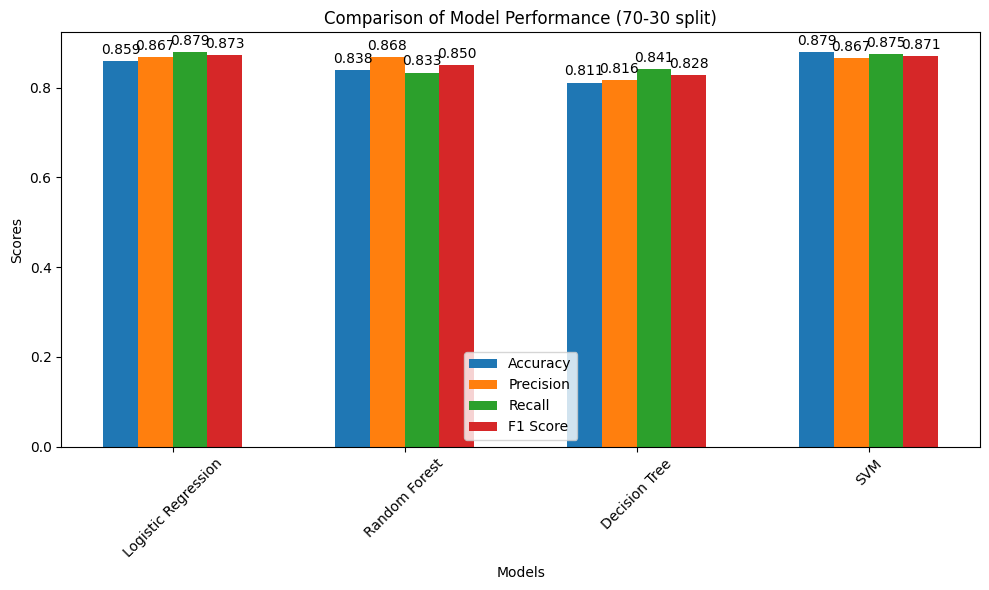

In [ ]:
import matplotlib.pyplot as plt

# Recall scores for all models
recall_scores = [recall_logreg, recall_rf, recall_dt, recall_svm]
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM']
accuracy_scores = [accuracy_logreg, accuracy_rf, accuracy_dt, accuracy_svm]
precision_scores = [precision_logreg, precision_rf, precision_dt, precision_svm]
f1_scores = [f1_logreg, f1_rf, f1_dt, f1_svm]

# Plotting bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
index = [i for i in range(len(models))]

accuracy_bar = ax.bar(index, accuracy_scores, bar_width, label='Accuracy')
precision_bar = ax.bar([i + bar_width for i in index], precision_scores, bar_width, label='Precision')
recall_bar = ax.bar([i + 2 * bar_width for i in index], recall_scores, bar_width, label='Recall')
f1_bar = ax.bar([i + 3 * bar_width for i in index], f1_scores, bar_width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance (70-30 split)')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

# Annotating bars with their values
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(accuracy_bar)
autolabel(precision_bar)
autolabel(recall_bar)
autolabel(f1_bar)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
print("Performance comparison in 70-30 split")
# Create lists of metric scores for each model
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM']
accuracy_scores = [accuracy_logreg, accuracy_rf, accuracy_dt, accuracy_svm]
precision_scores = [precision_logreg, precision_rf, precision_dt, precision_svm]
recall_scores = [recall_logreg, recall_rf, recall_dt, recall_svm]
f1_scores = [f1_logreg, f1_rf, f1_dt, f1_svm]

# Create a DataFrame to display the scores
score_matrix = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Set the 'Model' column as index
score_matrix.set_index('Model', inplace=True)

print(score_matrix)

Performance comparison in 70-30 split
                     Accuracy  Precision    Recall  F1-score
Model                                                       
Logistic Regression  0.858901   0.867010  0.878630  0.872781
Random Forest        0.838392   0.868115  0.833209  0.850304
Decision Tree        0.810931   0.816021  0.841198  0.828418
SVM                  0.878987   0.866519  0.874907  0.870693


### **SVM 75-25 split**

In [ ]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predicting polarity on train and test sets
y_pred_test_svm = svm_model.predict(X_test_tfidf)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

precision_svm = precision_score(y_test, y_pred_test_svm)
recall_svm = recall_score(y_test, y_pred_test_svm)
f1_svm = 2 * ((precision_svm * recall_svm) / (precision_svm + recall_svm))
print(f"Accuracy using SVM and TF-IDF (test data): {accuracy_test_svm}")
print(f"SVM - Precision: {precision_svm}, Recall: {recall_svm}, F1-score: {f1_svm}")

# Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train)
y_pred_train_logreg = logreg_model.predict(X_train_tfidf)
y_pred_logreg = logreg_model.predict(X_test_tfidf)
accuracy_train_logreg = accuracy_score(y_train, y_pred_train_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy using Logistic Regression and TF-IDF (test data): {accuracy_logreg}")

# Logistic Regression metrics
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = 2 * ((precision_logreg * recall_logreg) / (precision_logreg + recall_logreg))
print(f"Logistic Regression - Precision: {precision_logreg}, Recall: {recall_logreg}, F1-score: {f1_logreg}")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_train_rf = rf_model.predict(X_train_tfidf)
y_pred_rf = rf_model.predict(X_test_tfidf)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy using Random Forest and TF-IDF (test data): {accuracy_rf}")

# Random Forest metrics
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = 2 * ((precision_rf * recall_rf) / (precision_rf + recall_rf))
print(f"Random Forest - Precision: {precision_rf}, Recall: {recall_rf}, F1-score: {f1_rf}")

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
y_pred_train_dt = dt_model.predict(X_train_tfidf)
y_pred_dt = dt_model.predict(X_test_tfidf)
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy using Decision Tree and TF-IDF (training data): {accuracy_train_dt}")
print(f"Accuracy using Decision Tree and TF-IDF (test data): {accuracy_dt}")
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = 2 * ((precision_dt * recall_dt) / (precision_dt + recall_dt))
print(f"Decision Tree - Precision: {precision_dt}, Recall: {recall_dt}, F1-score: {f1_dt}")

Accuracy using SVM and TF-IDF (test data): 0.8493353028064993
SVM - Precision: 0.8559928443649374, Recall: 0.868421052631579, F1-score: 0.8621621621621622
Accuracy using Logistic Regression and TF-IDF (test data): 0.8532742491383555
Logistic Regression - Precision: 0.8538732394366197, Recall: 0.8802177858439202, F1-score: 0.8668453976764969
Accuracy using Random Forest and TF-IDF (test data): 0.8325947808961103
Random Forest - Precision: 0.8489010989010989, Recall: 0.8411978221415608, F1-score: 0.845031905195989
Accuracy using Decision Tree and TF-IDF (training data): 0.9998358772361726
Accuracy using Decision Tree and TF-IDF (test data): 0.810930576070901
Decision Tree - Precision: 0.8160211267605634, Recall: 0.8411978221415608, F1-score: 0.8284182305630027


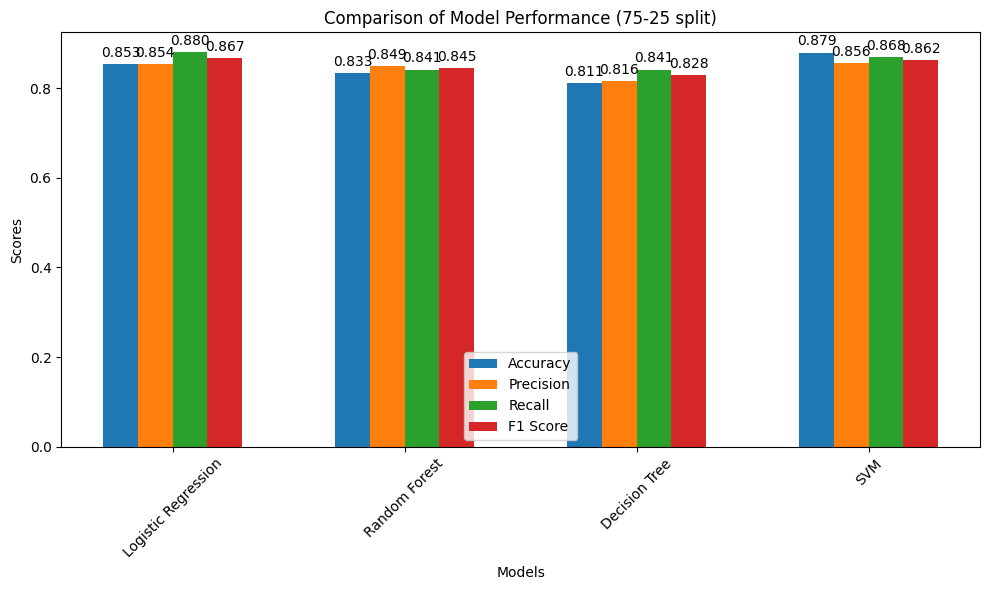

In [ ]:
recall_scores = [recall_logreg, recall_rf, recall_dt, recall_svm]
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM']
accuracy_scores = [accuracy_logreg, accuracy_rf, accuracy_dt, accuracy_svm]
precision_scores = [precision_logreg, precision_rf, precision_dt, precision_svm]
f1_scores = [f1_logreg, f1_rf, f1_dt, f1_svm]

# Plotting bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
index = [i for i in range(len(models))]

accuracy_bar = ax.bar(index, accuracy_scores, bar_width, label='Accuracy')
precision_bar = ax.bar([i + bar_width for i in index], precision_scores, bar_width, label='Precision')
recall_bar = ax.bar([i + 2 * bar_width for i in index], recall_scores, bar_width, label='Recall')
f1_bar = ax.bar([i + 3 * bar_width for i in index], f1_scores, bar_width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance (75-25 split)')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

# Annotating bars with their values
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(accuracy_bar)
autolabel(precision_bar)
autolabel(recall_bar)
autolabel(f1_bar)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
print("Performance comparison in 75-25 split")
# Create lists of metric scores for each model
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM']
accuracy_scores = [accuracy_logreg, accuracy_rf, accuracy_dt, accuracy_svm]
precision_scores = [precision_logreg, precision_rf, precision_dt, precision_svm]
recall_scores = [recall_logreg, recall_rf, recall_dt, recall_svm]
f1_scores = [f1_logreg, f1_rf, f1_dt, f1_svm]

# Create a DataFrame to display the scores
score_matrix = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Set the 'Model' column as index
score_matrix.set_index('Model', inplace=True)

print(score_matrix)

Performance comparison in 75-25 split
                     Accuracy  Precision    Recall  F1-score
Model                                                       
Logistic Regression  0.853274   0.853873  0.880218  0.866845
Random Forest        0.832595   0.848901  0.841198  0.845032
Decision Tree        0.810931   0.816021  0.841198  0.828418
SVM                  0.878987   0.855993  0.868421  0.862162


In [ ]:
# Classification report for SVM
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_test_svm))

Classification Report for SVM:
              precision    recall  f1-score   support

          -1       0.87      0.86      0.87      1095
           1       0.89      0.90      0.89      1343

    accuracy                           0.88      2438
   macro avg       0.88      0.88      0.88      2438
weighted avg       0.88      0.88      0.88      2438



In [ ]:
# Classification report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          -1       0.85      0.83      0.84      1095
           1       0.87      0.88      0.87      1343

    accuracy                           0.86      2438
   macro avg       0.86      0.86      0.86      2438
weighted avg       0.86      0.86      0.86      2438



In [ ]:
# Classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

          -1       0.81      0.84      0.82      1095
           1       0.87      0.83      0.85      1343

    accuracy                           0.84      2438
   macro avg       0.84      0.84      0.84      2438
weighted avg       0.84      0.84      0.84      2438



In [ ]:
# Classification report for Decision Tree
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

          -1       0.79      0.76      0.78      1095
           1       0.81      0.84      0.82      1343

    accuracy                           0.80      2438
   macro avg       0.80      0.80      0.80      2438
weighted avg       0.80      0.80      0.80      2438



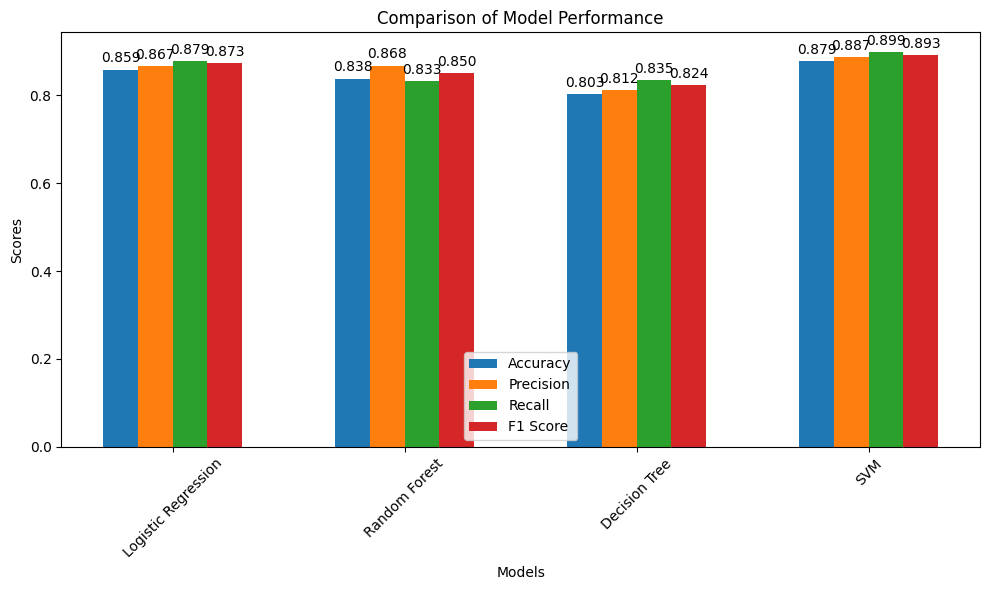

In [ ]:
import matplotlib.pyplot as plt

# Recall scores for all models
recall_scores = [recall_logreg, recall_rf, recall_dt, recall_svm]
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM']
accuracy_scores = [accuracy_logreg, accuracy_rf, accuracy_dt, accuracy_svm]
precision_scores = [precision_logreg, precision_rf, precision_dt, precision_svm]
f1_scores = [f1_logreg, f1_rf, f1_dt, f1_svm]

# Plotting bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
index = [i for i in range(len(models))]

accuracy_bar = ax.bar(index, accuracy_scores, bar_width, label='Accuracy')
precision_bar = ax.bar([i + bar_width for i in index], precision_scores, bar_width, label='Precision')
recall_bar = ax.bar([i + 2 * bar_width for i in index], recall_scores, bar_width, label='Recall')
f1_bar = ax.bar([i + 3 * bar_width for i in index], f1_scores, bar_width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

# Annotating bars with their values
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(accuracy_bar)
autolabel(precision_bar)
autolabel(recall_bar)
autolabel(f1_bar)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Create lists of metric scores for each model
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM']
accuracy_scores = [accuracy_logreg, accuracy_rf, accuracy_dt, accuracy_svm]
precision_scores = [precision_logreg, precision_rf, precision_dt, precision_svm]
recall_scores = [recall_logreg, recall_rf, recall_dt, recall_svm]
f1_scores = [f1_logreg, f1_rf, f1_dt, f1_svm]

# Create a DataFrame to display the scores
score_matrix = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Set the 'Model' column as index
score_matrix.set_index('Model', inplace=True)

print(score_matrix)

                     Accuracy  Precision    Recall  F1-score
Model                                                       
Logistic Regression  0.858901   0.867010  0.878630  0.872781
Random Forest        0.838392   0.868115  0.833209  0.850304
Decision Tree        0.803117   0.812455  0.835443  0.823789
SVM                  0.878987   0.886848  0.898734  0.892751


As we can see Logistic Regression and SVM perform a bit better than the other models. So we can choose any one among them.

### **Checking prediction on sample text**

In [ ]:
print("Enter a sentence")
data = input()
new_input_tfidf = tfidf_vectorizer.transform([data])
# Predicting the sentiment polarity for the new input using the trained SVM model
predicted_polarity = svm_model.predict(new_input_tfidf)
if predicted_polarity == 1:
  print("The predicted polarity for the input is positive")
else:
  print("The predicted polarity for the input is negative")

Enter a sentence
such a nice weather
The predicted polarity for the input is positive


### Saving the trained model for further use

In [ ]:
import pickle

# Saving the SVM model
filename = 'trained_model.sav'
pickle.dump(svm_model, open(filename, 'wb'))

# Loading the saved model
loaded_model = pickle.load(open(filename, 'rb'))

# Saving the TF-IDF vectorizer
vectorizer_name = 'tfidf_vector.sav'
pickle.dump(tfidf_vectorizer, open(vectorizer_name, 'wb'))

# Loading the saved vectorizer
loaded_vectorizer = pickle.load(open(vectorizer_name, 'rb'))


In [ ]:
data = input()
new_input_tfidf = loaded_vectorizer.transform([data])
predicted_polarity = loaded_model.predict(new_input_tfidf)
if predicted_polarity == 1:
  print("The predicted polarity for the input is positive")
else:
  print("The predicted polarity for the input is negative")

such a nice person
The predicted polarity for the input is positive
